In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# 주피터 노트북 에러 시 설치
# pip install pyzmq==19.0.2

In [2]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('./data/annotations/list.txt',skiprows = 6, delimiter = ' ',header = None)  
df.columns = ['file_name','id','species','breed']
df

file_name  id  species  breed
0           Abyssinian_100   1        1      1
1           Abyssinian_101   1        1      1
2           Abyssinian_102   1        1      1
3           Abyssinian_103   1        1      1
4           Abyssinian_104   1        1      1
...                    ...  ..      ...    ...
7344  yorkshire_terrier_96  37        2     25
7345  yorkshire_terrier_97  37        2     25
7346  yorkshire_terrier_98  37        2     25
7347  yorkshire_terrier_99  37        2     25
7348   yorkshire_terrier_9  37        2     25

[7349 rows x 4 columns]

In [3]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


([<matplotlib.axis.XTick at 0x197ada6a520>,
 [Text(0, 0, '1'), Text(1, 0, '2')])

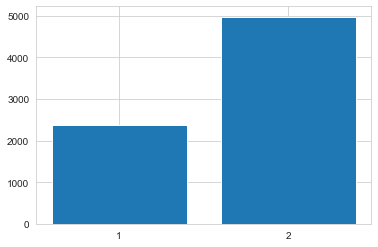

In [4]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values, align = "center")
plt.xticks(range(len(value_counts)), value_counts.index.values)

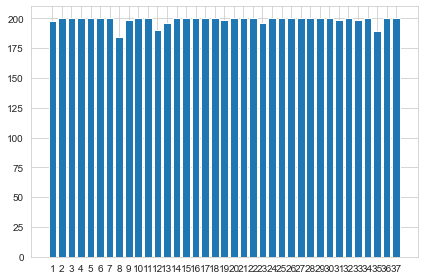

In [5]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values, align = "center")
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

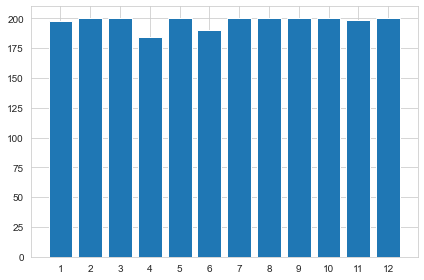

In [6]:
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index() # 고양이

plt.bar(range(len(value_counts)),value_counts.values, align = "center")
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()
# 고양이의 종류는 총 12종
# 대략 종마다 200장의 이미지가 있음

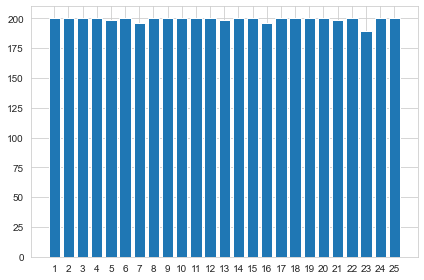

In [7]:
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index() # 강아지

plt.bar(range(len(value_counts)),value_counts.values, align = "center")
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

# 강아지의 종류는 총 25종
# 대략 종마다 200장의 이미지가 있음

In [8]:
import os # 경로 탐색
from glob import glob # 파일을 경로로 읽어들이기 위함

In [9]:
# 상대 경로로 이미지에 대한 각각의 정보가 저장되어 있는 곳들의 경로 잡아주기
image_dir = "data\\images\\"
bbox_dir = "data\\annotations\\xmls\\"
seg_dir = "data\\annotations\\trimaps\\"

In [10]:
image_files = glob(image_dir + "*.jpg") # 파일이름을 리스트 형태로 변환 하는데 사용
len(image_files)

7390

In [11]:
image_files[:10]

['data\\images\\Abyssinian_1.jpg',
 'data\\images\\Abyssinian_10.jpg',
 'data\\images\\Abyssinian_100.jpg',
 'data\\images\\Abyssinian_101.jpg',
 'data\\images\\Abyssinian_102.jpg',
 'data\\images\\Abyssinian_103.jpg',
 'data\\images\\Abyssinian_104.jpg',
 'data\\images\\Abyssinian_105.jpg',
 'data\\images\\Abyssinian_106.jpg',
 'data\\images\\Abyssinian_107.jpg']

In [13]:
seg_files = glob(seg_dir + "*.png")
len(seg_files)

7390

In [14]:
seg_files[:10]

['data\\annotations\\trimaps\\Abyssinian_1.png',
 'data\\annotations\\trimaps\\Abyssinian_10.png',
 'data\\annotations\\trimaps\\Abyssinian_100.png',
 'data\\annotations\\trimaps\\Abyssinian_101.png',
 'data\\annotations\\trimaps\\Abyssinian_102.png',
 'data\\annotations\\trimaps\\Abyssinian_103.png',
 'data\\annotations\\trimaps\\Abyssinian_104.png',
 'data\\annotations\\trimaps\\Abyssinian_105.png',
 'data\\annotations\\trimaps\\Abyssinian_106.png',
 'data\\annotations\\trimaps\\Abyssinian_107.png']

In [16]:
bbox_files = glob(bbox_dir + "*.xml")
len(bbox_files)

3686

In [17]:
bbox_files[:10]

['data\\annotations\\xmls\\Abyssinian_1.xml',
 'data\\annotations\\xmls\\Abyssinian_10.xml',
 'data\\annotations\\xmls\\Abyssinian_100.xml',
 'data\\annotations\\xmls\\Abyssinian_101.xml',
 'data\\annotations\\xmls\\Abyssinian_102.xml',
 'data\\annotations\\xmls\\Abyssinian_103.xml',
 'data\\annotations\\xmls\\Abyssinian_105.xml',
 'data\\annotations\\xmls\\Abyssinian_106.xml',
 'data\\annotations\\xmls\\Abyssinian_107.xml',
 'data\\annotations\\xmls\\Abyssinian_108.xml']

### OpenCV 모듈
* Open Source Computer Vision의 약자
* 영상 처리에 사용할 수 있는 오픈소스 라이브러리
* 공장에서 제품 검사, 의료 영상 처리 및 보정, CCTV 영상, 로보틱스, 자율주행자동차 등
* 머신러닝과 AI를 활용하여 활용도가 더욱 넓어짐

In [ ]:
# openCV 모듈
# !pip install opencv-python

In [19]:
import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

data\annotations\xmls\Abyssinian_154.xml


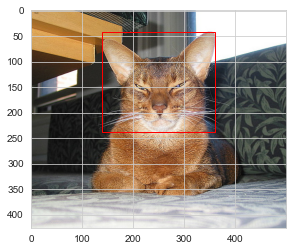

In [24]:
images_path = image_files[60]
bbox_path = images_path.replace(image_dir, bbox_dir).replace('jpg','xml')

image = cv2.imread(images_path) # 이미지 파일을 읽어옴(절대 또는 상대 경로를 사용)
# image.shape : (200,222,3)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #BGR -> RGB

print(bbox_path)
tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y),rect_w,rect_h,fill = False,color = "red")
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

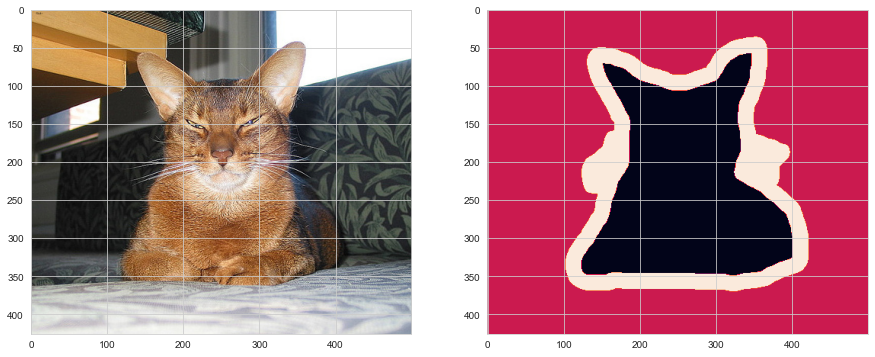

In [28]:
image_path = image_files[60]
seg_path = image_path.replace(image_dir,seg_dir).replace('jpg','png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg_map)

plt.show()

### 교차 검증(Cross Validation)
* 데이터의 수가 적은 경우 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어짐
* 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않음
* 데이터 수가 적은 경우 해결하기 위한 검증 방법

In [30]:
from sklearn.model_selection import KFold

In [32]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42) # 교차검증

df['fold'] = -1
for idx, (t,v) in enumerate(kf.split(df),1): # enumerate 안에 있는 개수만큼 for문을 돌림 + 인덱스 생성 가능
    print(t,v,len(v))
    df.loc[v,'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [33]:
df

file_name  id  species  breed  fold
0           Abyssinian_100   1        1      1     1
1           Abyssinian_101   1        1      1     4
2           Abyssinian_102   1        1      1     4
3           Abyssinian_103   1        1      1     5
4           Abyssinian_104   1        1      1     5
...                    ...  ..      ...    ...   ...
7344  yorkshire_terrier_96  37        2     25     2
7345  yorkshire_terrier_97  37        2     25     1
7346  yorkshire_terrier_98  37        2     25     4
7347  yorkshire_terrier_99  37        2     25     3
7348   yorkshire_terrier_9  37        2     25     5

[7349 rows x 5 columns]

In [34]:
print(len(df[df['fold'] == 1]))

1470


In [35]:
print(len(df[df['fold'] != 1]))

5879


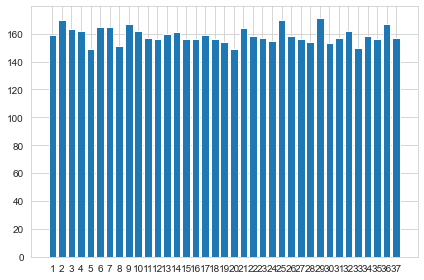

In [36]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align = "center")
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import StratifiedKFold # 교차검증을 위한 모듈

In [42]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

df['fold'] = -1
for idx, (t,v) in enumerate(skf.split(df,df['id']),1): # enumerate의 시작: 1
    print(t,v,len(v))
    df.loc[v,'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


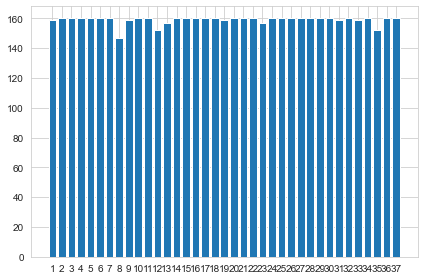

In [43]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align = "center")
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [44]:
df.to_csv('data/kfolds.csv',index = False)